In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from mlgrad.af import averaging_function
from mlgrad.func import Sqrt

In [3]:
from sklearn.datasets import make_hastie_10_2

In [4]:
import numpy as np

In [5]:
XX, YY = make_hastie_10_2(4000)
Xt, Yt = XX[2000:], YY[2000:]
X, Y = XX[:2000], YY[:2000]
N = len(Y)
NN = len(YY)
n = X.shape[1]
M = 100

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import matplotlib.pyplot as plt

$$
\ell (y, r) = -yr + \ln(1+e^r)
$$
$$
\ell^\prime_r (y, r) = -y + \frac {1} {1+e^{-r}}
$$

In [8]:
from scipy.special import expit, logsumexp
def loss(gb, X, Y):
    raw_predictions = gb._raw_predict(X).ravel()
    R = (1-Y)*raw_predictions
    # R = -1*(Y * raw_predictions).sum(axis=1) + logsumexp(raw_predictions, axis=1)
    return R

In [9]:
gb = GradientBoostingClassifier(n_estimators=M)
gb.fit(X, Y)
score = accuracy_score(Y, gb.predict(X))
score_t = accuracy_score(Yt, gb.predict(Xt))
print(score, score_t)

0.9725 0.893


In [10]:
YY1 = YY.copy()

In [11]:
Is = np.random.randint(0, NN, int(0.4*NN))
for i in Is:
    YY1[i] = -YY[i]

Y1 = YY1[:2000]
Y1t = YY1[2000:]

In [12]:
gb = GradientBoostingClassifier(n_estimators=M)
gb.fit(X, Y1)
score = accuracy_score(Y, gb.predict(X))
score_t = accuracy_score(Yt, gb.predict(Xt))
print(score, score_t)
avg = averaging_function('WM', alpha=0.95, rhofunc=Sqrt(0.001))

0.771 0.7595


In [13]:
loss(gb, X, Y1)

array([0.        , 0.        , 0.        , ..., 1.99125785, 7.32402861,
       9.41670927])

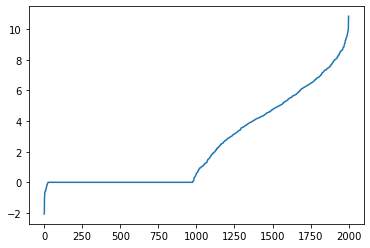

In [14]:
plt.plot(sorted(loss(gb, X, Y1)))

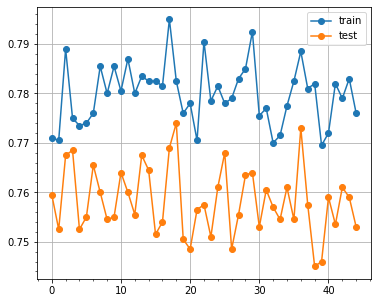

In [15]:
scores = [score]
scores_t = [score_t]
for k in range(44):
    U = loss(gb, X, Y1)
    avg.fit(U)
    G = avg.nabla(U)

    gb.fit(X, Y1, G)
    score = accuracy_score(Y, gb.predict(X))
    score_t = accuracy_score(Yt, gb.predict(Xt))
    scores.append(score)
    scores_t.append(score_t)
    
plt.figure(figsize=(6,5))
plt.plot(scores, marker='o', label='train')
plt.plot(scores_t, marker='o', label='test')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()